#                                            DIRECTIONAL DRILLING 
##                                           *DIRECTIONAL WELLS PROFILES AND DIRECTIONAL WELLSS TRAYECTORIES*

***

<img src="Well_prof.jpg" width=800 height=800 />

# Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple
from math import radians, isclose, acos, asin, cos, sin, tan, atan, degrees, sqrt
from welly import Location
from welly import Well

In [2]:
%config Completer.use_jedi = False

# *Directional Wells Profiles*

## *Slant Well Profile (J Type)*

<img src="j_prof.png" width=400 height=100 align='center' />

In [3]:
Data = namedtuple("Input", "TVD KOP BUR DH")
Output = namedtuple("Output", "R Theta TVD_EOB Md_EOB Dh_EOB Tan_len Md_total")

def well_J(data:Data, unit='ingles') -> Output:
    tvd = data.TVD
    kop = data.KOP
    bur = data.BUR
    dh = data.DH
    if unit == 'ingles':
        R = 5729.58 / bur
    else:
        R = 1718.87 / bur
    if dh > R:
        dc = dh - R
    elif dh < R:
        dc =   R - dh
    do = tvd - kop
    doc = degrees(atan(dc / do))
    oc = sqrt(dc**2 + do**2)
    boc = degrees(acos(R / oc))
    if R < dh:
        bod = boc - doc
    elif R > dh:
        bod = boc + doc
    theta = 90 - bod
    tvd_eob = kop + abs(R * sin(radians(theta)))
    if unit == 'ingles':
        md_eob = kop + (theta / bur) * 100
    else:
        md_eob = kop + (theta / bur) * 30
    dh_eob = R - R * cos(radians(theta))
    tan_len = sqrt(oc**2 - R**2)
    if unit == 'ingles':
        md_total = kop + (theta / bur) * 100 + tan_len
    else:
        md_total = kop + (theta / bur) * 30 + tan_len
    return Output(R=R, Theta=theta, TVD_EOB=tvd_eob, Md_EOB=md_eob, Dh_EOB=dh_eob, \
                  Tan_len=tan_len, Md_total=md_total)

## *Ejercicio 1*

In [4]:
# data
tvd = 8000 #ft
kop = 500 #ft
bur = 2 #o/100ft
dh = 970.8 #ft

In [5]:
trajectory_J = well_J(Data(tvd, kop, bur, dh))

In [6]:
trajectory_J

Output(R=2864.79, Theta=7.564230623470863, TVD_EOB=877.1139517978513, Md_EOB=878.2115311735431, Dh_EOB=24.929649303260703, Tan_len=7185.414140882904, Md_total=8063.625672056447)

In [7]:
names = ['R', 'theta', 'tvd_EOB', 'Md_EOB', 'Dh_EOB', 'Lengh_tan', 'Md_Total']
for param , value in zip(names, trajectory_J):
    if param == 'theta':
        print(f"{param} -> {value} degrees")
    else:
        print(f"{param} -> {value} ft")

R -> 2864.79 ft
theta -> 7.564230623470863 degrees
tvd_EOB -> 877.1139517978513 ft
Md_EOB -> 878.2115311735431 ft
Dh_EOB -> 24.929649303260703 ft
Lengh_tan -> 7185.414140882904 ft
Md_Total -> 8063.625672056447 ft


## *S-Type Well Profile*

<img src="s_prof.png" width=400 height=100 />

In [8]:
Data_S = namedtuple("Input", "TVD KOP BUR DOR DH")
Output_S = namedtuple("Output", "R1 R2 Theta TVD_EOB Md_EOB Dh_EOB Tan_len Md_SOD TVD_SOD Dh_SOD Md_total")

def well_S(data:Data_S, unit='ingles'):
    tvd = data.TVD
    kop = data.KOP
    bur = data.BUR
    dor = data.DOR
    dh = data.DH
    if unit == 'ingles':
        R1 = 5729.58 / bur
        R2 = 5729.58 / dor
    else:
        R1 = 1718.87 / bur
        R2 = 1718.87 / dor
    if dh > (R1 + R2):
        fe = dh - (R1 + R2)
    elif dh < (R1 + R2):
        fe = R1 - (dh - R2)
    eo = tvd - kop
    foe = degrees(atan(fe / eo))
    of = sqrt(fe**2 + eo**2)
    fg = R1 + R2
    fog = degrees(asin(fg / of))
    theta = fog - foe
    tvd_eob = kop + R1 * sin(radians(theta))
    if unit == 'ingles':
        md_eob = kop + (theta / bur) * 100
    else:
        md_eob = kop + (theta / bur) * 30
    dh_eob = R1 - abs(R1 * cos(radians(theta)))
    tan_len = sqrt(of**2 - fg**2)
    if unit == 'ingles':
        md_sod = kop + (theta / bur) * 100 + tan_len 
    else:
         md_sod = kop + (theta / bur) * 30 + tan_len 
    tvd_sod = tvd_eob + tan_len * abs(cos(radians(theta)))
    dh_sod = dh_eob + abs(tan_len * sin(radians(theta)))
    if unit == 'ingles':
        md_total = kop + (theta / bur) * 100 + tan_len + (theta / dor) * 100
    else:
        md_total = kop + (theta / bur) * 30 + tan_len + (theta / dor) * 30
    return Output_S(R1=R1, R2=R2, Theta=theta, TVD_EOB=tvd_eob, Md_EOB=md_eob, Dh_EOB=dh_eob, \
                    Tan_len=tan_len, Md_SOD=md_sod, TVD_SOD=tvd_sod, Dh_SOD=dh_sod, Md_total=md_total)

# *Ejercicio 2*

In [9]:
# Data
kop = 6084 #ft
tvd = 12000 #ft
bur = 3 #o/100ft
dor = 2 #o/ft
dh = 3500 #ft

In [10]:
trajectory_S = well_S(Data_S(tvd, kop, bur, dor, dh))

In [11]:
trajectory_S

Output(R1=1909.86, R2=2864.79, Theta=39.93029740693158, TVD_EOB=7309.853592805263, Md_EOB=7415.009913564386, Dh_EOB=445.32997688458863, Tan_len=3718.401000430159, Md_SOD=11133.410913994545, TVD_SOD=10161.219610792105, Dh_SOD=2832.0050346731164, Md_total=13129.925784341123)

In [12]:
names = ['R1', 'R2', 'theta', 'tvd_EOB', 'Md_EOB', 'Dh_EOB', 'Lengh_tan', 'Md_SOD', 'tvd_SOD', 'Dh_SOD', 'Md_Total']
for param , value in zip(names, trajectory_S):
    if param == 'theta':
        print(f"{param} -> {value} degrees")
    else:
        print(f"{param} -> {value} ft")

R1 -> 1909.86 ft
R2 -> 2864.79 ft
theta -> 39.93029740693158 degrees
tvd_EOB -> 7309.853592805263 ft
Md_EOB -> 7415.009913564386 ft
Dh_EOB -> 445.32997688458863 ft
Lengh_tan -> 3718.401000430159 ft
Md_SOD -> 11133.410913994545 ft
tvd_SOD -> 10161.219610792105 ft
Dh_SOD -> 2832.0050346731164 ft
Md_Total -> 13129.925784341123 ft


## *Horizontal Well Profiles*

<img src="Horizontal_prof.jpg" width=400 height=100 />

In [13]:
Data_H = namedtuple("Input", "TVD KOP BUR1 BUR2 DH")
Output_H = namedtuple("Output", "R1 R2 Theta TVD_EOB1 Md_EOB1 Dh_EOB1 Tan_len Md_SOB2 Md_total")

def well_H(data:Data_S, unit='ingles'):
    tvd = data.TVD
    kop = data.KOP
    bur1 = data.BUR1
    bur2 = data.BUR2
    dh = data.DH
    if unit == 'ingles':
        R1 = 5729.58 / bur1
        R2 = 5729.58 / bur2
    else:
        R1 = 1718.87 / bur1
        R2 = 1718.87 / bur2
    eg = (tvd - kop) - R2
    eo = dh - R1
    goe = degrees(atan(eg / eo))
    og = sqrt(eg**2 + eo**2)
    of = R1 - R2
    gof = degrees(acos(of / og))
    theta = 180 - goe - gof
    tvd_eob1 = kop + R1 * sin(radians(theta))
    if unit == 'ingles':
        md_eob1 = kop + (theta / bur1) * 100
    else:
        md_eob1 = kop + (theta / bur1) * 30
    dh_eob1 = R1 - abs(R1 * cos(radians(theta)))
    tan_len = sqrt(og**2 - of**2)
    if unit == 'ingles':
        md_sob2 = kop + (theta / bur1) * 100 + tan_len 
    else:
        md_sob2 = kop + (theta / bur1) * 30 + tan_len 
    #tvd_sod = tvd_eob + tan_len * abs(cos(radians(theta)))
    #dh_sod = dh_eob + abs(tan_len * sin(radians(theta)))
    if unit == 'ingles':
        md_total = kop + (theta / bur1) * 100 + tan_len + ((90 - theta) / bur2) * 100
    else:
        md_total = kop + (theta / bur1) * 30 + tan_len + ((90 - theta) / bur2) * 30
    return Output_H(R1=R1, R2=R2, Theta=theta, TVD_EOB1=tvd_eob1, Md_EOB1=md_eob1, Dh_EOB1=dh_eob1, \
                    Tan_len=tan_len, Md_SOB2=md_sob2, Md_total=md_total)

# *Ejercicio 3*

In [14]:
# Data
tvd = 3800 #ft
kop = 2000 #ft
bur1 = 5.73 #o/100ft
bur2 = 9.55 #o/100ft
dh = 1800 #ft

In [15]:
trajectory_H = well_H(Data_H(tvd, kop, bur1, bur2, dh))

In [16]:
trajectory_H

Output(R1=999.9267015706805, R2=599.9560209424084, Theta=49.79153676571747, TVD_EOB1=2763.6447008457926, Md_EOB1=2868.9622472202, Dh_EOB1=354.4035188853795, Tan_len=1385.729515154276, Md_SOB2=4254.691762374476, Md_total=4675.722791005706)

In [17]:
names = ['R1', 'R2', 'theta', 'tvd_EOB1', 'Md_EOB1', 'Dh_EOB1', 'Lengh_tan', 'Md_SOB2', 'Md_Total']
for param , value in zip(names, trajectory_H):
    if param == 'theta':
        print(f"{param} -> {value} degrees")
    else:
        print(f"{param} -> {value} ft")

R1 -> 999.9267015706805 ft
R2 -> 599.9560209424084 ft
theta -> 49.79153676571747 degrees
tvd_EOB1 -> 2763.6447008457926 ft
Md_EOB1 -> 2868.9622472202 ft
Dh_EOB1 -> 354.4035188853795 ft
Lengh_tan -> 1385.729515154276 ft
Md_SOB2 -> 4254.691762374476 ft
Md_Total -> 4675.722791005706 ft


# *Lección*

In [18]:
# Data
tvd = 8000 #ft
kop = 1560 #ft
bur =  2.66 #o/100ft
dh = 2201.16 #ft

In [19]:
pozo_j = well_J(Data(tvd, kop, bur, dh))

In [20]:
pozo_j

Output(R=2153.9774436090224, Theta=19.959447179578135, TVD_EOB=2295.270888082583, Md_EOB=2310.3551571269973, Dh_EOB=129.37981723614007, Tan_len=6069.28392531204, Md_total=8379.639082439036)

In [21]:
names = ['R', 'theta', 'tvd_EOB', 'Md_EOB', 'Dh_EOB', 'Lengh_tan', 'Md_Total']
for param , value in zip(names, pozo_j):
    if param == 'theta':
        print(f"{param} -> {value} degrees")
    else:
        print(f"{param} -> {value} ft")

R -> 2153.9774436090224 ft
theta -> 19.959447179578135 degrees
tvd_EOB -> 2295.270888082583 ft
Md_EOB -> 2310.3551571269973 ft
Dh_EOB -> 129.37981723614007 ft
Lengh_tan -> 6069.28392531204 ft
Md_Total -> 8379.639082439036 ft


***

# *Directional Wells Trayectories*

## Import Las file

In [22]:
data = Well.from_las('L05-15-Spliced.las')

C:\Users\fredd\miniconda3\lib\site-packages\welly\well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [23]:
data

Well(uwi: '', 25 curves: ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH', 'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ', 'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC', 'ZDNCQH'])

<img src="nether_field.jpg" width=400 height=100 />

## Import Survey Data
Survey data is commonly measured at irregular intervals during the drilling process. It gives a snapshot of the measured depth, inclination and azimuth at the time of the survey. From this, we can calculated the True Vertical Depth, x-offset and y-offset from the origin point of the well.

In [24]:
survey = pd.read_csv('L05-15-Survey.csv')

In [25]:
survey.head()

,MD,INC,AZI,TVD,X-offset,Y-offset
0,0.0,0.00,0.00,0.00,0.00,0.00
1,89.3,0.00,0.00,89.30,0.00,0.00
2,142.1,2.31,323.48,142.09,-0.63,0.86
3,170.2,3.89,319.12,170.14,-1.59,2.03
4,197.9,5.86,315.60,197.74,-3.20,3.75


Welly requires the survey data to contain MD - measured depth, INC - inclination and AZI - azimuth. This allows the library to calculate the TVD, X-offset and Y-offset.

We can subset the data by using the square brackets and passing in a list of the column names.

In [26]:
survey_subset = survey[['MD', 'INC', 'AZI']]

In [27]:
survey_subset.head()

,MD,INC,AZI
0,0.0,0.00,0.00
1,89.3,0.00,0.00
2,142.1,2.31,323.48
3,170.2,3.89,319.12
4,197.9,5.86,315.60


## Adding Survey Data to Welly Well
After the survey data has been loaded from a CSV file, we need to calculate our location parameters. By default welly is set to calculate these using the minimum curvature method, which is the most common and most accurate method for this purpose. More information can be found at https://petrowiki.spe.org/Calculation_methods_for_directional_survey

In [28]:
#Add deviation data to a well
data.location.add_deviation(survey_subset.values)

In [29]:
data

Well(uwi: '', 25 curves: ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH', 'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ', 'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC', 'ZDNCQH'])

Now that the survey data has been loaded in, and attached to the well, we can call upon `data.location.position` to view the data. 

The data is formatted as: X-offset, Y-offset and TVD.

In [30]:
#View first five rows of the data
data.location.position[:5]

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  89.3       ],
       [ -0.6333253 ,   0.8552655 , 142.08569704],
       [ -1.59422229,   2.03112298, 170.14372544],
       [ -3.19869524,   3.75201703, 197.74222054]])

We can extract each of the location parameters into variables by slicing up the array. This is done using square brakcets and selecting all rows using the colon (:) followed by the column within the array.

In [31]:
x_loc = data.location.position[:,0]
y_loc = data.location.position[:,1]
z_loc = data.location.position[:,2]

In [32]:
z_loc

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

## Creating Location Plots
To understand the position of the well, we can call upon three plots.  
The first plots the x and y offset and gives us a top down view / map view of the well path.  
The next two plots show us how the well changes in the x location versus TVD and the y location versus TVD.

Text(0.5, 1.0, 'Y Location vs TVD')

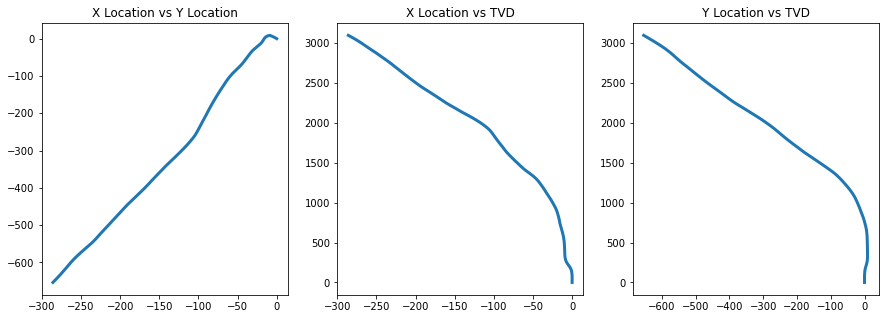

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=3)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=3)
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=3)
ax3.set_title('Y Location vs TVD')

### Add Markers for Start of the Well & End of the Well
We can add a couple of markers to our plot to show the starting location (black square) and the end location (red star) of the well.  
Additionally, for the plots with TVD, we can understand them better if we invert the y-axis using `ax.invert_yaxis()`

Text(0.5, 1.0, 'Y Location vs TVD')

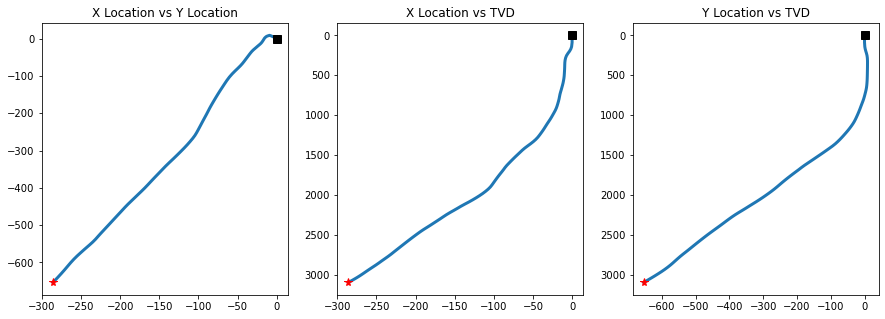

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=3)
ax1.plot(x_loc[0], y_loc[0], marker='s', color='black', ms=8)
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red', ms=8)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=3)
ax2.plot(x_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax2.invert_yaxis()
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=3)
ax3.plot(y_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax3.invert_yaxis()
ax3.set_title('Y Location vs TVD')


### Compare Against Original Survey
We are fortunate enough to have a survey file that contains the location parameters and TVD, so we can do a quick check with what Welly has calculated and the ones contained within the CSV file.

Text(0.5, 1.0, 'X Location vs TVD')

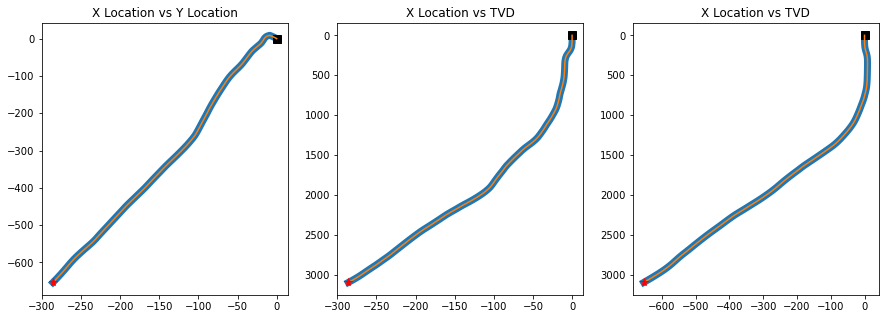

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=7)
ax1.plot(x_loc[0], y_loc[0], marker='s', color='black', ms=8)
ax1.plot(survey['X-offset'], survey['Y-offset'])
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red', ms=8)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=7)
ax2.plot(x_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax2.plot(survey['X-offset'], survey['TVD'])
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax2.invert_yaxis()
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=7)
ax3.plot(y_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax3.plot(survey['Y-offset'], survey['TVD'])
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax3.invert_yaxis()
ax3.set_title('X Location vs TVD')



### Create 3D Plot of Well Path
Rather than viewing the data in two dimensions, we can view it in three dimensions using matplotlib. But first we have to calculate continuous data. This is done by using `location.trajectory()`. Here we can provide a datum, i.e the UTM co-ordinates of the well location at surface, and a vertical offset.

<img src="well_nethe.jpg" width=800 height=100 />

In [36]:
# Create a trajectory of regularly sampled points
location_data = data.location.trajectory(datum=[589075.56, 5963534.91, 0], elev=False)

In [37]:
xs = location_data[:,0]
ys = location_data[:,1]
zs = location_data[:,2]

In [38]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

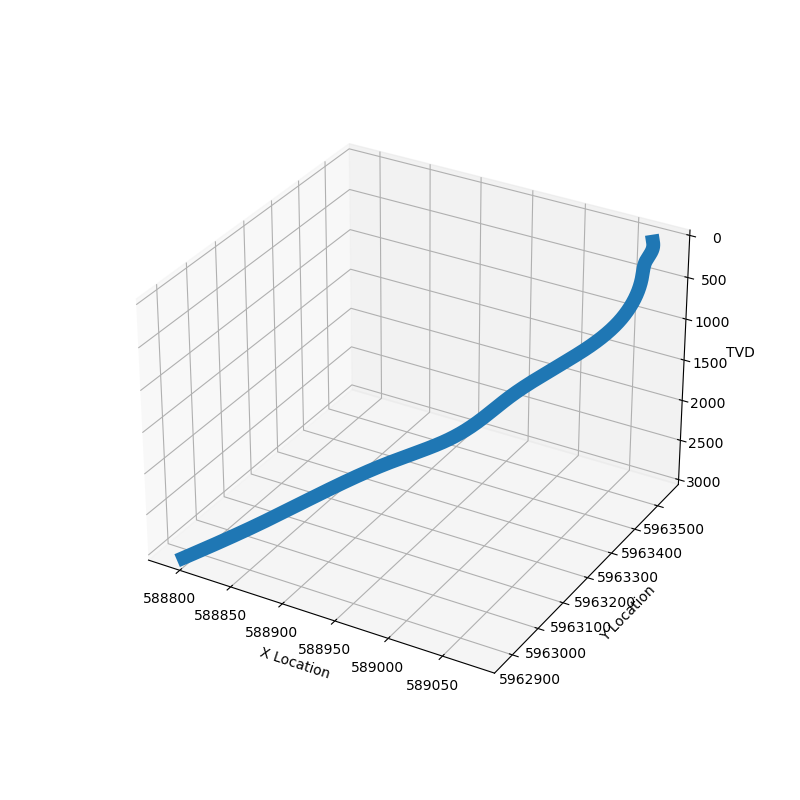

In [39]:
fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, lw=10)
ax.set_zlim(3000, 0)

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('TVD')

plt.ticklabel_format(style='plain')
plt.show()